### Import Necessary Module and Set Path 

In [55]:
import sqlite3 as lite
import os
import sys
sys.path.insert(0, '../scripts/')
jupyter_directory = os.getcwd()

In [56]:
import write_deployinst_input as wr
import analysis as an

## Run Cyclus Input file

In [59]:
! rm cyclus.sqlite
! cyclus eg01-eg24-cycamore.xml

              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       __O|/O___O|/O_OO|/O__O|/O__O|/O____________O|/O__
     CCCCCCf     iCCCLCC     /////////////////////////////////////////////////
     iCCCt  ;;;;;.  CCCC                                                      
    CCCC  ;;;;;;;;;. CClL.                          c                         
   CCCC ,;;       ;;: CCCC  ;                   : CCCCi                       
    CCC ;;         ;;  CC   ;;:                CCC`   `C;                     
  lCCC ;;              CCCC  ;;;:             :CC .;;. C;   ;    :   ;  :;;   
  CCCC ;.              CCCC    ;;;,           CC ;    ; Ci  ;    :   ;  :  ;  
   iCC :;               CC       ;;;,        ;C ;       CC  ;    :   ; .      
  CCCi ;;               CCC        ;;;.      .C ;   

### The output file should be named 
         
          cyclus.sqlite

In [60]:
# Wait for the complete message to move on

con = lite.connect('cyclus.sqlite')
with con:
    cur = con.cursor()
    
    # get simulation time info
    init_year, init_month, duration, timestep = an.get_sim_time_duration(cur)
    
    # prints net capacity and number of reactor timeseries
    an.plot_power(cur)
    
    # get tailings mass timeseries
    tailings = an.commodity_in_out_facility(cur, 'enrichment',
                                            ['tailings'], True, False, True)
    an.stacked_bar_chart(tailings, timestep,
                      'Year', 'Mass [MTHM]',
                      'Tailings vs Time',
                      'tailings', init_year)

    # get fuel mass timeseries
    fuel_dict = an.fuel_usage_timeseries(cur, ['uox', 'mox'])
    an.stacked_bar_chart(fuel_dict, timestep,
                      'Years', 'Mass[MTHM]',
                      'Total Fuel Mass vs Time',
                      'total_fuel',
                      init_year)
    
    # uranium utilization
    dictionary = {}
    dictionary['uranium_utilization'] = an.u_util_calc(cur)
    an.stacked_bar_chart(dictionary, timestep,
                         'Years', 'U Utilization Factor',
                         'U Utilization vs Time',
                         'u_util', init_year)

    # get reprocessed material flow
    combined = an.commodity_in_out_facility(cur, 'separations', ['mox_Pu', 'uox_Pu'], True, False, True)
    from_spent_uox = an.commodity_in_out_facility(cur, 'separations', ['uox_Pu'], True, False, True)
    from_spent_mox = an.commodity_in_out_facility(cur, 'separations', ['mox_Pu'], True, False, True)
    an.stacked_bar_chart(combined, timestep, 'Years', 'Mass[MTHM]',
                      'Total reprocessed outflux vs Time', 'combined',
                      init_year)
    an.stacked_bar_chart(from_spent_uox, timestep, 'Years', 'Mass[MTHM]',
                      'reprocessed from spent UOX vs Time', 'from_spent_uox',
                      init_year)
    an.stacked_bar_chart(from_spent_mox, timestep, 'Years', 'Mass[MTHM]',
                      'reprocessed from spent MOX vs Time', 'from_spent_mox',
                      init_year)

print('Finished!')

sink_source_facilities has no values
sink_source_facilities has no values


../scripts/analysis.py:740: RuntimeWarning: invalid value encountered in true_divide
  u_util_timeseries = np.nan_to_num(fuel_timeseries / u_supply_timeseries)


The Simulation Average Uranium Utilization is:
0.263457098611
Finished!


In [21]:
an.conv_ratio(cur, 'mox', 'sfr_spent_mox', False)

The Conversion Factor is:
0.3472281979879165


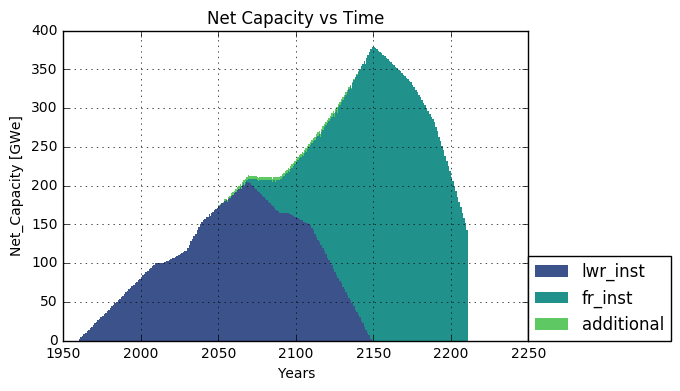

In [19]:
# Display Net Capacity vs Time
from IPython.display import Image
Image(filename='power_plot.png')

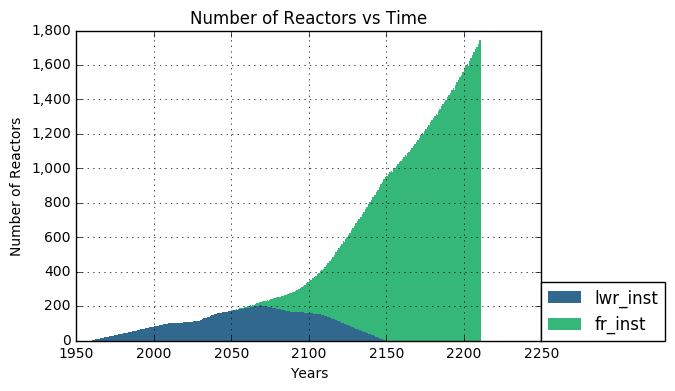

In [6]:
# Display Number of Reactors vs Time
from IPython.display import Image
Image(filename='number_plot.png')

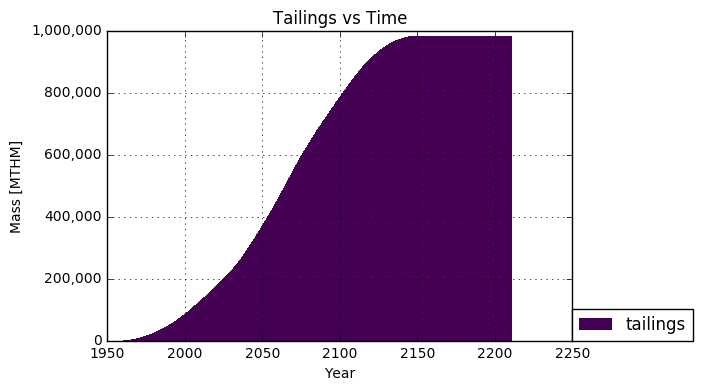

In [7]:
# Display Tailings vs Time
from IPython.display import Image
Image(filename='tailings.png')

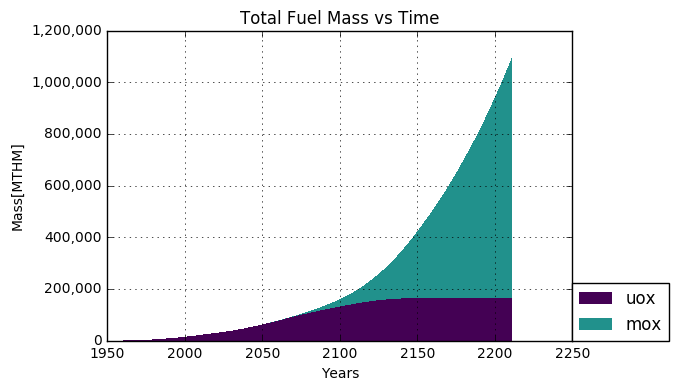

In [8]:
# Display Total Fuel vs Time
from IPython.display import Image
Image(filename='total_fuel.png')

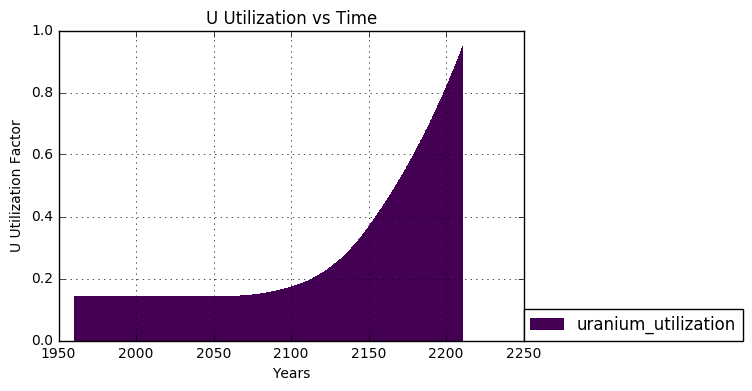

In [9]:
# Display Uranium Utilization vs Time
from IPython.display import Image
Image(filename='u_util.png')

In [ ]:
# Display Separated Pu Flow
from IPython.display import Image
Image(filename='combined.png')

from IPython.display import Image
Image(filename='from_spent_mox.png')

from IPython.display import Image
Image(filename='from_spent_uox.png')